# Hands Gesture Classifier


### Table of Contents:
1. [Import of libraries](#0)
2. [Data mining](#1)
3. [Preprocessing](#2)
4. [Classifiers](#3)
5. [Testing](#4)
6. [Compare the results](#5)


## <a name='0'></a>1. Import of libraries

In [2]:
!pip install opencv-python==4.5.3.56 
!pip install mediapipe==0.8.8 

In [15]:
import numpy as np
import uuid
import time
import pandas as pd
import sklearn

# Plots
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import csv
import os

import hand_detector as hd
from models import ActionType, HandType

import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

sklearn.__version__

'0.24.1'

## Prepare

### Constants variables

In [7]:
COORDS_FILE_NAME = 'hand_gesture_coords.csv'
DATA_DIRECTORY = os.path.join('data')
print(os.name)

nt


## Setup Folders

In [8]:
if not os.path.exists(DATA_DIRECTORY):
    if os.name == 'posix':
        !mkdir -p {DATA_DIRECTORY}
    if os.name == 'nt':
         !mkdir {DATA_DIRECTORY}

## <a name='1'></a>2. Data mining

### Implement Simple Camera Capture

In [8]:
cam_width, cam_height = 1280, 720

cap = cv2.VideoCapture(0)
cap.set(3, cam_width)
cap.set(4, cam_height)

detector = hd.HandDetector(max_num_hands=2)
    
while cap.isOpened():
    success, img = cap.read()
    print(img)
    
    imgname = os.path.join(DATA_DIRECTORY, '{}.jpg'.format(str(uuid.uuid1())))
    cv2.imwrite(imgname, img)
    time.sleep(2)
    
    all_hands, img = detector.find_hands(img)
    if all_hands:
        hand = all_hands[0]
        hand_landmarks_list = all_hands[0].landmarks
        
        
        

    cv2.imshow("Hands Gesture Classifier", img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [151 175 189]
  [149 173 187]
  [146 170 184]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [150 171 186]
  [149 170 185]
  [148 169 184]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [150 167 183]
  [151 168 184]
  [151 168 183]]

 ...

 [[132 129 139]
  [133 130 140]
  [132 130 140]
  ...
  [189 180 191]
  [179 171 182]
  [182 175 186]]

 [[132 129 139]
  [132 129 139]
  [130 128 138]
  ...
  [179 170 184]
  [172 164 178]
  [171 164 178]]

 [[132 129 139]
  [130 127 137]
  [129 127 137]
  ...
  [177 169 184]
  [170 163 178]
  [173 166 181]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [146 162 199]
  [143 159 196]
  [151 167 204]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [147 161 199]
  [143 157 195]
  [150 164 202]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [147 160 199]
  [144 156 195]
  [151 163 202]]

 ...

 [[120 108 154]
  [118 107 153]
  [113 105 149]
  ..

[[[113 172 198]
  [112 171 197]
  [111 169 195]
  ...
  [198 214 231]
  [199 215 232]
  [200 216 233]]

 [[112 169 195]
  [112 169 195]
  [113 169 195]
  ...
  [199 215 232]
  [200 216 233]
  [201 217 234]]

 [[112 165 192]
  [113 166 193]
  [114 167 194]
  ...
  [200 215 232]
  [201 216 233]
  [202 217 234]]

 ...

 [[ 98  38  79]
  [ 93  35  76]
  [ 93  39  79]
  ...
  [114  82 134]
  [117  86 135]
  [119  88 136]]

 [[ 98  37  81]
  [ 94  35  79]
  [ 95  39  82]
  ...
  [116  88 135]
  [119  92 135]
  [120  95 136]]

 [[ 96  34  80]
  [ 95  35  80]
  [ 96  39  84]
  ...
  [122  96 140]
  [124 101 140]
  [125 102 140]]]
[[[150 166 173]
  [155 171 180]
  [158 177 188]
  ...
  [192 209 232]
  [196 214 237]
  [201 219 242]]

 [[153 169 176]
  [157 174 181]
  [159 178 188]
  ...
  [193 209 232]
  [196 213 236]
  [200 217 240]]

 [[155 171 177]
  [157 174 180]
  [158 178 185]
  ...
  [195 209 232]
  [196 211 234]
  [200 215 238]]

 ...

 [[ 76  56  79]
  [ 73  53  76]
  [ 72  53  76]
  ..

Read saved photo

In [12]:
hand_landmarks_list = []
hand = None

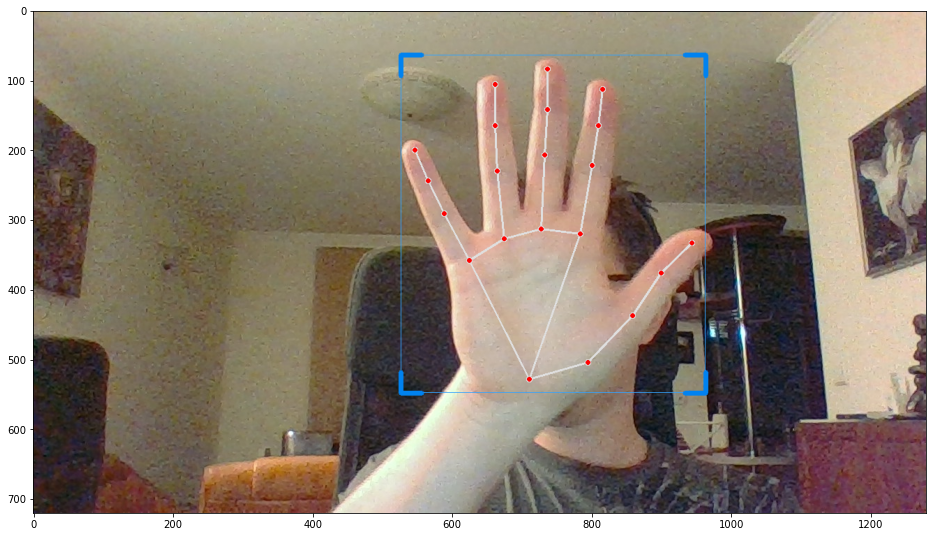

In [42]:
file_name = '92cc76f1-29ea-11ec-a40d-0897987f9062.jpg'

detector = hd.HandDetector(max_num_hands=2)

img = cv2.imread(os.path.join(DATA_DIRECTORY, file_name))

all_hands, img = detector.find_hands(img)
if all_hands:
    hand = all_hands[0]
    hand_landmarks_list = hand.landmarks

# Show image 
plt.figure(figsize=(16,12))

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
imgplot = plt.imshow(img)
plt.show()

In [26]:
number_coords = len(hand_landmarks_list)

number_coords

21

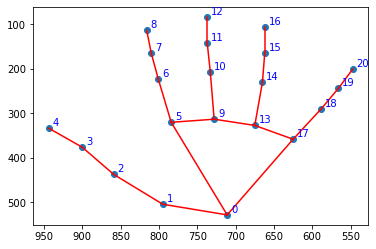

In [49]:
landmarks_connections = [
    (0, 1), (1, 2), (2, 3), (3, 4), (0, 5), (5, 6), (6, 7), (7, 8), 
    (5, 9), (9, 10), (10, 11), (11, 12), (9, 13), (13, 14), (14, 15), 
    (15, 16), (13,17), (17, 18), (18, 19), (19, 20), (0, 17)
]

x = []
y = []



for landmark in hand_landmarks_list: 
    x.append(landmark[0])
    y.append(landmark[1])
    

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for p_1, p_2 in landmarks_connections:
    plt.plot([x[p_1], x[p_2]], [y[p_1], y[p_2]], 'r')

plt.scatter(x, y)
for index, coord in enumerate(zip(x, y)):
    plt.text(coord[0] - 5, coord[1] - 5, index, color='blue')
    
plt.show()

### Prepare dataset file (.csv)

In [62]:
columns = ['target']
for val in range(1, number_coords + 1):
    columns += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]
    
columns

['target',
 'x1',
 'y1',
 'z1',
 'x2',
 'y2',
 'z2',
 'x3',
 'y3',
 'z3',
 'x4',
 'y4',
 'z4',
 'x5',
 'y5',
 'z5',
 'x6',
 'y6',
 'z6',
 'x7',
 'y7',
 'z7',
 'x8',
 'y8',
 'z8',
 'x9',
 'y9',
 'z9',
 'x10',
 'y10',
 'z10',
 'x11',
 'y11',
 'z11',
 'x12',
 'y12',
 'z12',
 'x13',
 'y13',
 'z13',
 'x14',
 'y14',
 'z14',
 'x15',
 'y15',
 'z15',
 'x16',
 'y16',
 'z16',
 'x17',
 'y17',
 'z17',
 'x18',
 'y18',
 'z18',
 'x19',
 'y19',
 'z19',
 'x20',
 'y20',
 'z20',
 'x21',
 'y21',
 'z21']

Create dataset file and save prepared columns names in it 

In [67]:
with open(COORDS_FILE_NAME, mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(columns)

In [68]:
for a in ActionType:
    print(a)

ActionType.CLICK
ActionType.RESET
ActionType.GRAB
ActionType.GO_BACK
ActionType.GO_FORWARD


### Create hand gesture dataset 

In [22]:
def create_gesture_dataset(action_type: ActionType, hand_type: HandType, sample_num = 100):
    """
    The function reads the location with all landmarks via a webcam. Pre-processes the data. 
    It also saves the finished data in a file.
    :param action_type: Action type for which the samples will be created.
    :param hand_type: Type of hand for which the samples will be created.
    :param sample_num: Number of samples created for action type.
    """
    cam_width, cam_height = 1280, 720
    cap = cv2.VideoCapture(0)
    cap.set(3, cam_width)
    cap.set(4, cam_height)

    detector = hd.HandDetector(max_num_hands=2)

    while cap.isOpened():
        success, img = cap.read()
        all_hands, img = detector.find_hands(img)
       
        for hand in all_hands:
            if hand.type == hand_type:
                row = list(np.array(hand.landmarks).flatten())
                row.insert(0, action_type.value) 
                
#                 Save to file
                with open(COORDS_FILE_NAME, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
                
                sample_num = sample_num - 1
        
        
            
        cv2.imshow("Hands Gesture Classifier", img)
        
        if sample_num <= 0:
            break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [23]:
create_gesture_dataset(ActionType(0), HandType.RIGHT)

99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


## <a name='2'></a>3. Preprocessing


In [19]:
# Prepocessing code

## <a name='3'></a>4. Classifiers


In [24]:
"""
    This function fetches stock market quotations.
"""

list = np.array([2,3,4])

## <a name='4'></a>5. Testing

In [16]:
# testing code

## <a name='5'></a>6. Compare the results